In [1]:
# import sys
# sys.path.append('..')

import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# from src.analysis import plot_categoric_attribute, plot_discrete_attribute
# from src.helpers import get_numeric_columns

In [2]:
%run 1st_Functions.ipynb

In [3]:
# Connect to DB
conn, cursor= connect()

import pandas
# sql = """ SELECT * from players where field_position in ('GK') """
sql = f"SELECT * from players"

data = pandas.read_sql(sql, con=conn)
# conn.commit()

# Disconnect from DB
disconnect(conn, cursor)

# data = create_players_dataframes(data, columns_to_keep)
# display(data)
display(data.shape)
# goal_keepers_data = create_fifa_players_dataset(goal_keepers_data, './resources/', 'goal_keepers.csv')

<connection object at 0x00000209369E9150; dsn: 'user=postgres password=xxx dbname=fifa-players-prediction host=fifa-players-prediction.c05nwfquwc6t.us-east-1.rds.amazonaws.com port=5432', closed: 0>
Connected!


(18147, 88)

## Data structure
|columns|rows|
|--|--|
|88|18159|

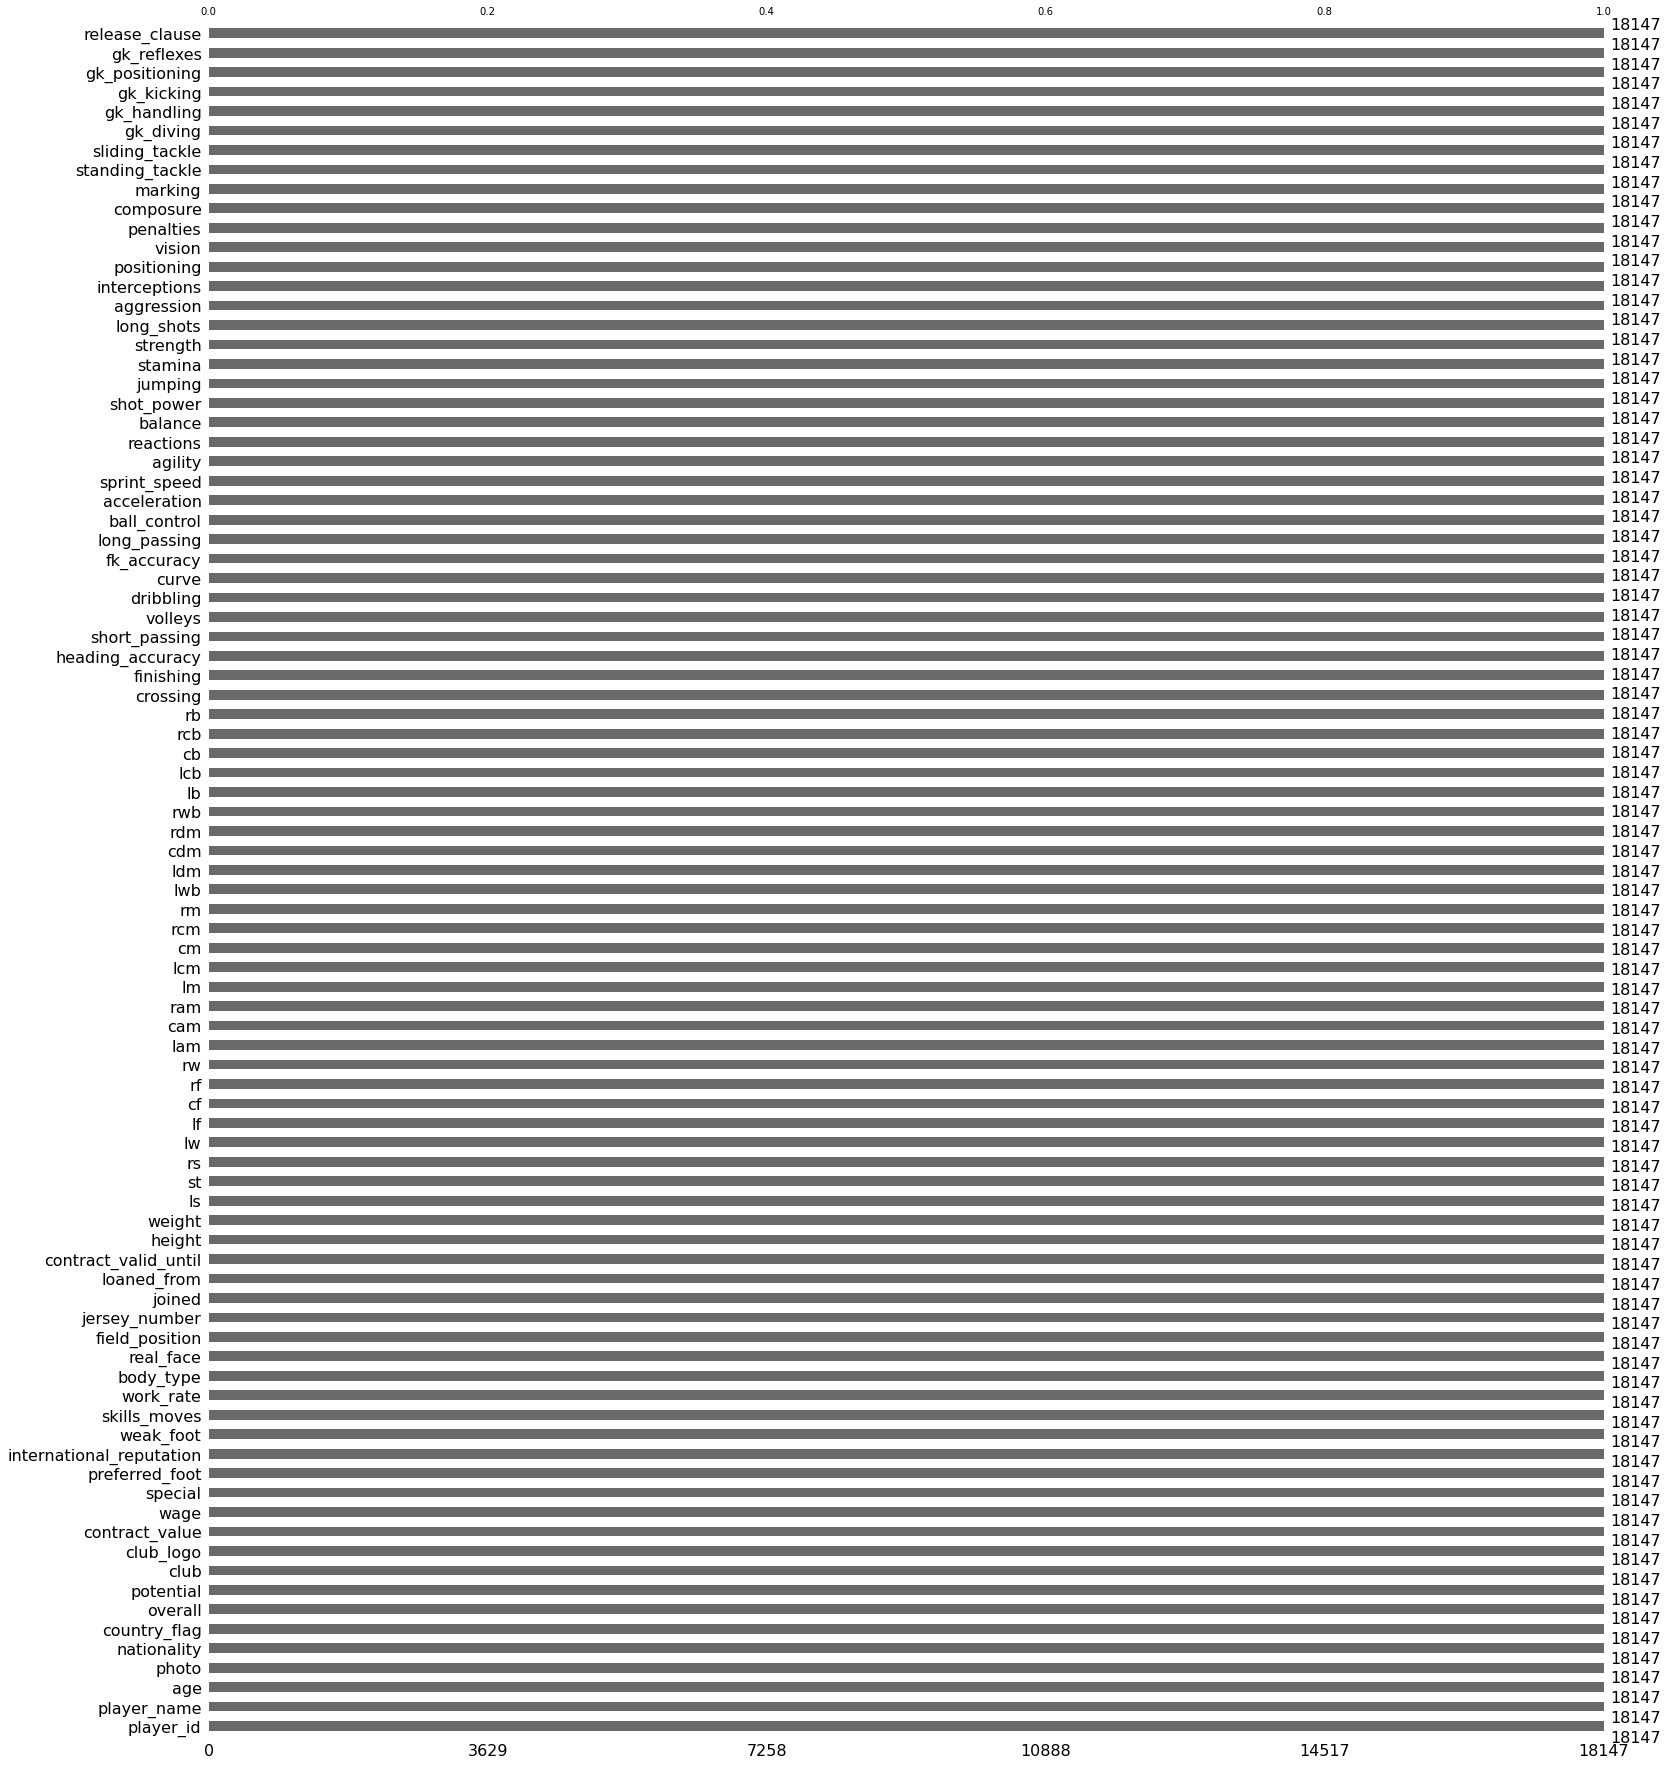

In [4]:
# https://github.com/ResidentMario/missingno
# !pip install missingno
# file_path ='resources/fifa_world_players_alt.csv'
# data = pd.read_csv(file_path)


import missingno as msno
plot_count = 1
column_groups = np.array_split(data.columns, plot_count)

for columns in column_groups:
    msno.bar(data[columns])
    plt.show()

In [5]:
print(data.shape)
# display(data.head())
data.info()

(18147, 88)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 18147 non-null  int64  
 1   player_name               18147 non-null  object 
 2   age                       18147 non-null  float64
 3   photo                     18147 non-null  object 
 4   nationality               18147 non-null  object 
 5   country_flag              18147 non-null  object 
 6   overall                   18147 non-null  float64
 7   potential                 18147 non-null  float64
 8   club                      18147 non-null  object 
 9   club_logo                 18147 non-null  object 
 10  contract_value            18147 non-null  object 
 11  wage                      18147 non-null  object 
 12  special                   18147 non-null  object 
 13  preferred_foot            18147 non-null  object 

In [6]:
data.columns


Index(['player_id', 'player_name', 'age', 'photo', 'nationality',
       'country_flag', 'overall', 'potential', 'club', 'club_logo',
       'contract_value', 'wage', 'special', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skills_moves', 'work_rate',
       'body_type', 'real_face', 'field_position', 'jersey_number', 'joined',
       'loaned_from', 'contract_valid_until', 'height', 'weight', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marki

In [7]:
data.drop(['ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'], axis =1, inplace = True)
data.columns

Index(['player_id', 'player_name', 'age', 'photo', 'nationality',
       'country_flag', 'overall', 'potential', 'club', 'club_logo',
       'contract_value', 'wage', 'special', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skills_moves', 'work_rate',
       'body_type', 'real_face', 'field_position', 'jersey_number', 'joined',
       'loaned_from', 'contract_valid_until', 'height', 'weight', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'release_clause'],
      dtype='object')

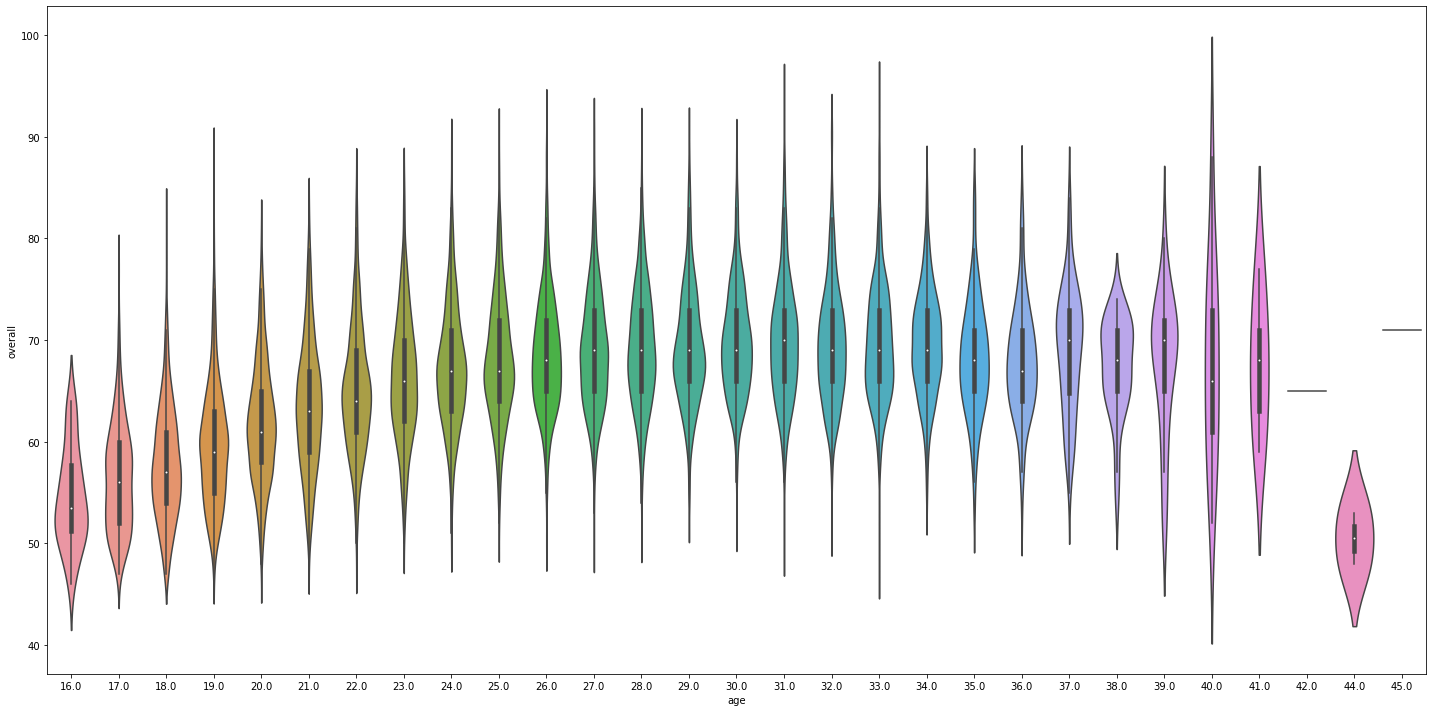

In [8]:
plt.figure(figsize = (20,10))
sns.violinplot(x="age",y = "overall", data = data)
plt.tight_layout()
plt.show()

## Create position class

In [9]:
keepers = []
defenders = []
mid_fielders = []
forwards = []
position_class = data['field_position'].unique()
position_class[-1] = 'unknown'


for label in position_class:
    if(label[-1] == 'K'):
        keepers.append(label)
    if(label[-1] == 'M'):
        mid_fielders.append(label)
    elif(label[-1] =='B'):
        defenders.append(label)
    elif(label[-1] in 'T', 'F', 'S'):
        forwards.append(label)
    else: pass

%store keepers
%store defenders
%store mid_fielders
%store forwards

print(position_class)
print(f"\n{defenders}")
print(f"\n{keepers}")
print(f"\n{mid_fielders}")
print(f"\n{forwards}")

Stored 'keepers' (list)
Stored 'defenders' (list)
Stored 'mid_fielders' (list)
Stored 'forwards' (list)
['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'unknown']

['RCB', 'CB', 'LCB', 'LB', 'RB', 'RWB']

['GK']

['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']

['RF', 'ST', 'LW', 'GK', 'LF', 'RS', 'LS', 'RW', 'CF', 'unknown']


## Relevance of Qualitative Features to Rating

In [10]:
data.columns

Index(['player_id', 'player_name', 'age', 'photo', 'nationality',
       'country_flag', 'overall', 'potential', 'club', 'club_logo',
       'contract_value', 'wage', 'special', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skills_moves', 'work_rate',
       'body_type', 'real_face', 'field_position', 'jersey_number', 'joined',
       'loaned_from', 'contract_valid_until', 'height', 'weight', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'release_clause'],
      dtype='object')

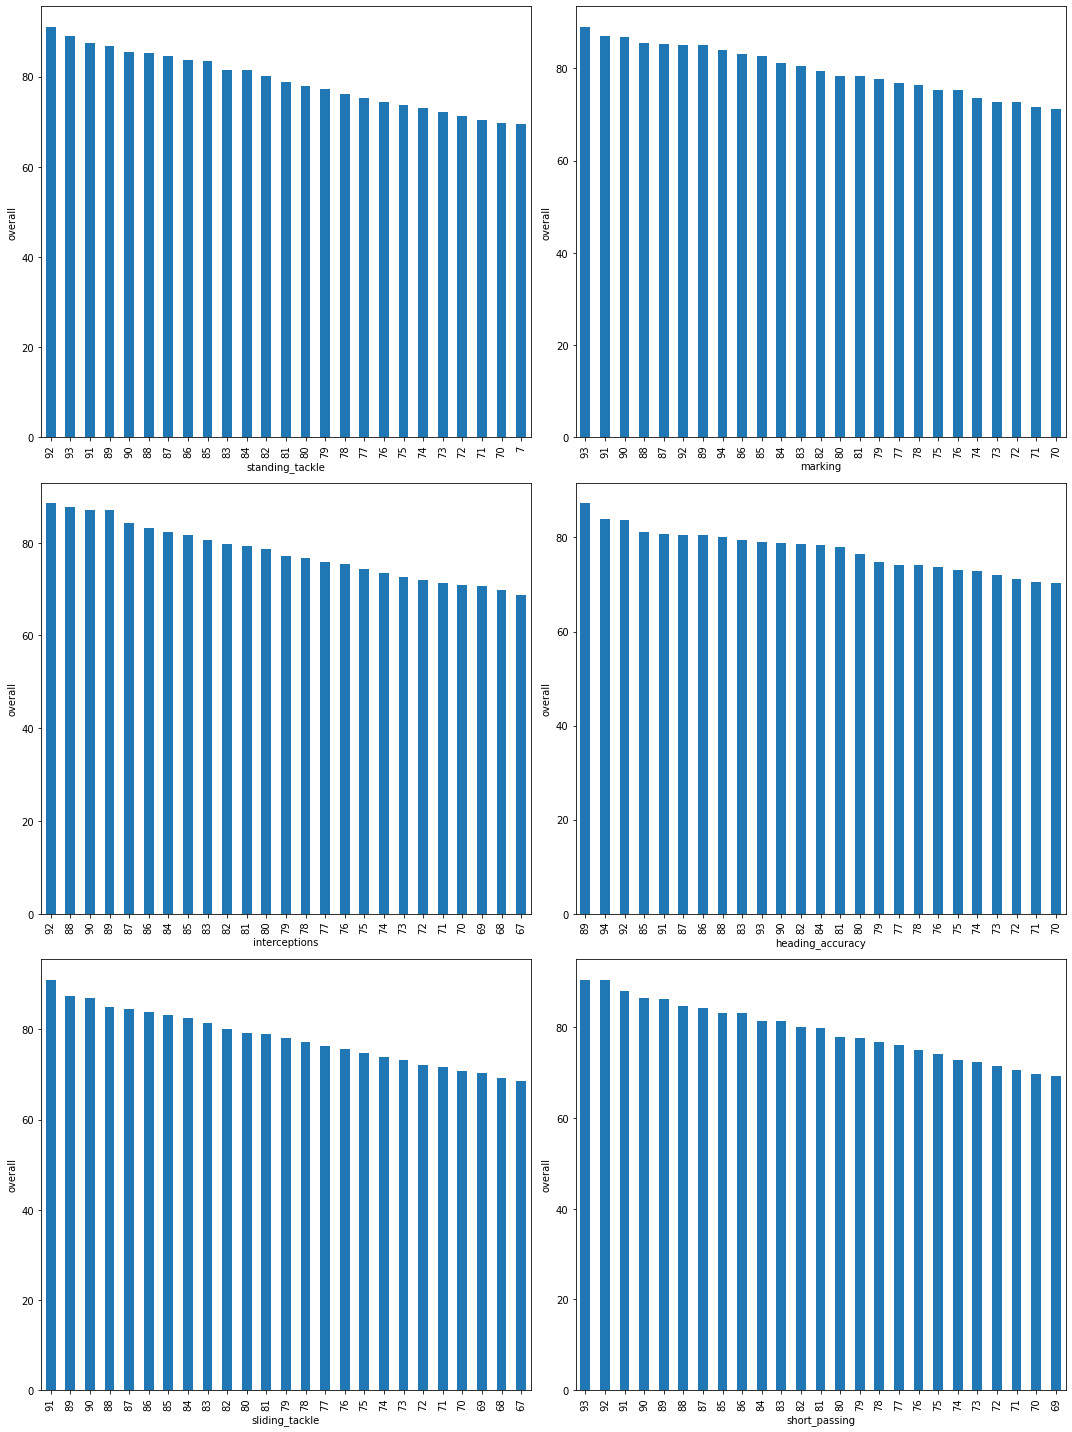

In [11]:
target_vals = ['standing_tackle', 'marking', 'interceptions', 'heading_accuracy', 'sliding_tackle', 'short_passing']
# print(target_vals)
fig = plt.figure(figsize = (15,20))

for i, feature in enumerate(target_vals):
    # print(feature)
    # print(data.groupby([feature]).mean()["overall"])
    ax = fig.add_subplot(3,2,i+1)
    data.groupby([feature]).mean()["overall"].sort_values(ascending=False)[0:25].plot(kind="bar")
    ax.set_ylabel("overall")
    
plt.tight_layout()
plt.show()

## Quant Features against Rating

In [12]:
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso, LinearRegression
df_vals = data.select_dtypes(["int64", 'float64'])
df_vals = df_vals.drop("overall", axis = 1)
rating = data["overall"]
df_vals.info()


X = df_vals.values
X = scale(X)
y = rating.values.ravel()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_id         18147 non-null  int64  
 1   age               18147 non-null  float64
 2   potential         18147 non-null  float64
 3   crossing          18147 non-null  int64  
 4   finishing         18147 non-null  int64  
 5   heading_accuracy  18147 non-null  int64  
 6   short_passing     18147 non-null  int64  
 7   volleys           18147 non-null  int64  
 8   dribbling         18147 non-null  int64  
 9   curve             18147 non-null  int64  
 10  fk_accuracy       18147 non-null  int64  
 11  long_passing      18147 non-null  int64  
 12  ball_control      18147 non-null  int64  
 13  acceleration      18147 non-null  int64  
 14  sprint_speed      18147 non-null  int64  
 15  agility           18147 non-null  int64  
 16  reactions         18147 non-null  int64 

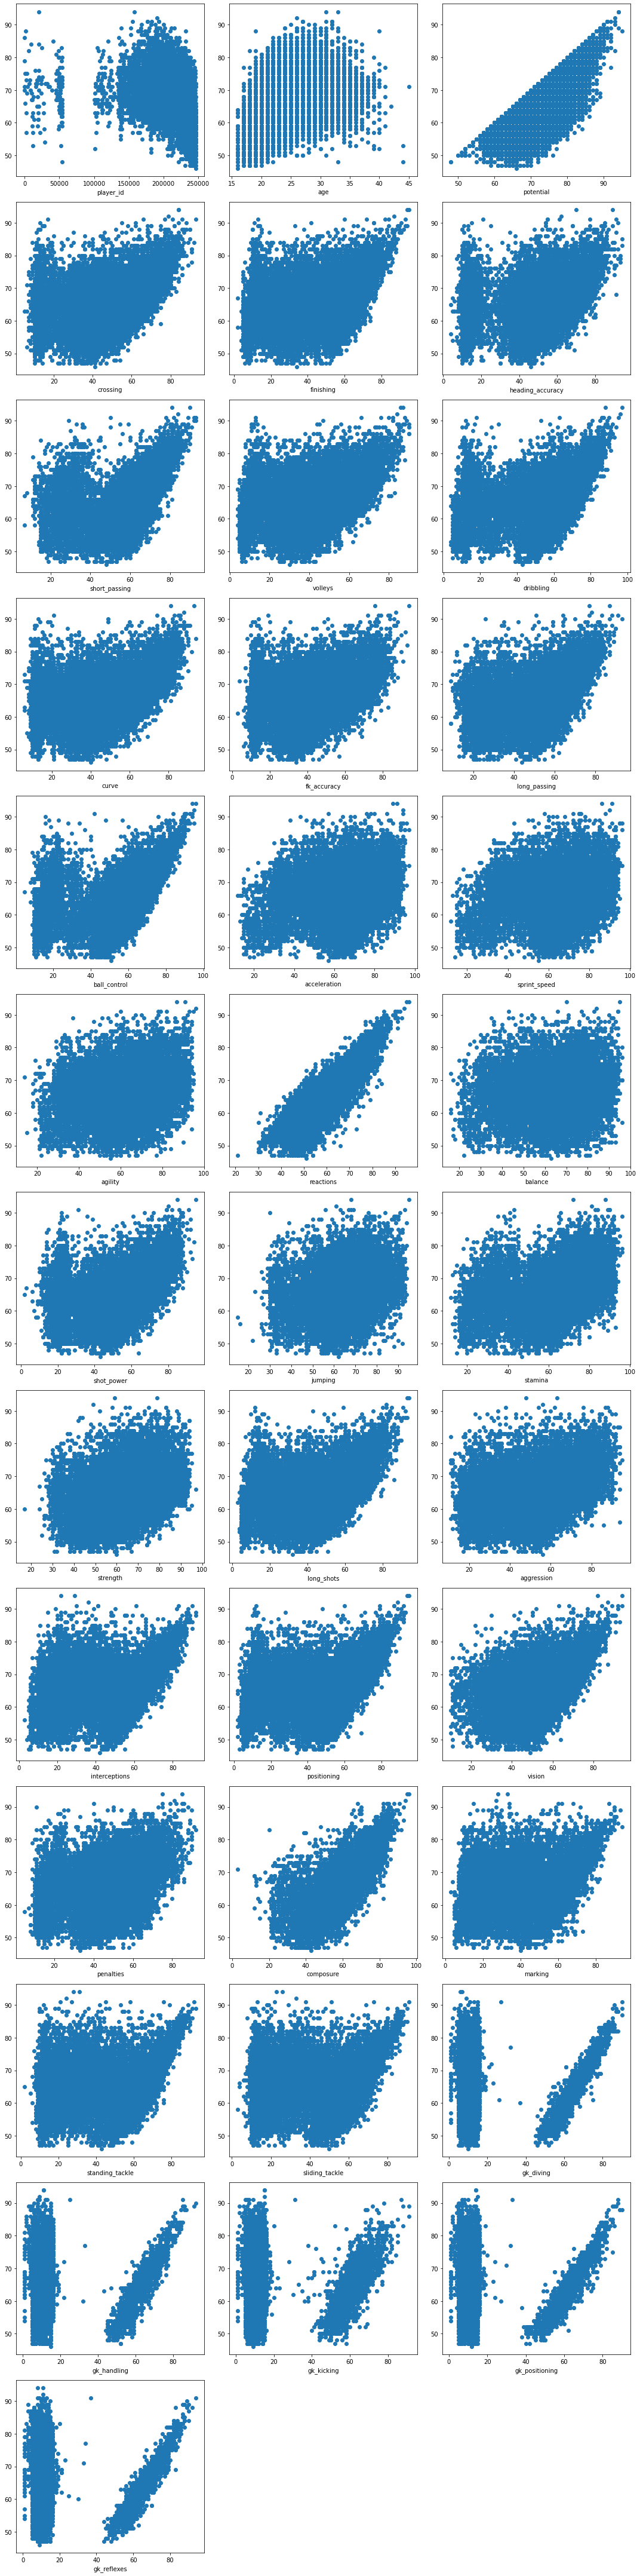

In [13]:
fig = plt.figure(figsize = (15,60))
for idx in range(37):
    feature = df_vals.columns[idx]
    ax = fig.add_subplot(13,3,idx+1)
    Xtmp = df_vals[feature]
    ax.scatter(Xtmp, y)
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

## Prediction of a Player’s Rating

## Feature selection

In [14]:
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 50)
rfe_fit = rfe.fit(X, y)

for feat in df_vals.columns[rfe_fit.support_]:
    print(feat)

player_id
age
potential
crossing
finishing
heading_accuracy
short_passing
volleys
dribbling
curve
fk_accuracy
long_passing
ball_control
acceleration
sprint_speed
agility
reactions
balance
shot_power
jumping
stamina
strength
long_shots
aggression
interceptions
positioning
vision
penalties
composure
marking
standing_tackle
sliding_tackle
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


here!
################################################################################
Fitting 'Decision Tree' regressor.
Name: Decision Tree Score: 0.93 Time 0.3049 secs
################################################################################
Fitting 'Random Forest' regressor.
Name: Random Forest Score: 0.96 Time 14.4012 secs
################################################################################
Fitting 'GradientBooster' regressor.
Name: GradientBooster Score: 0.88 Time 1.0555 secs
################################################################################
Fitting 'Logistic Regression' regressor.


C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Name: Logistic Regression Score: 0.90 Time 3.0149 secs


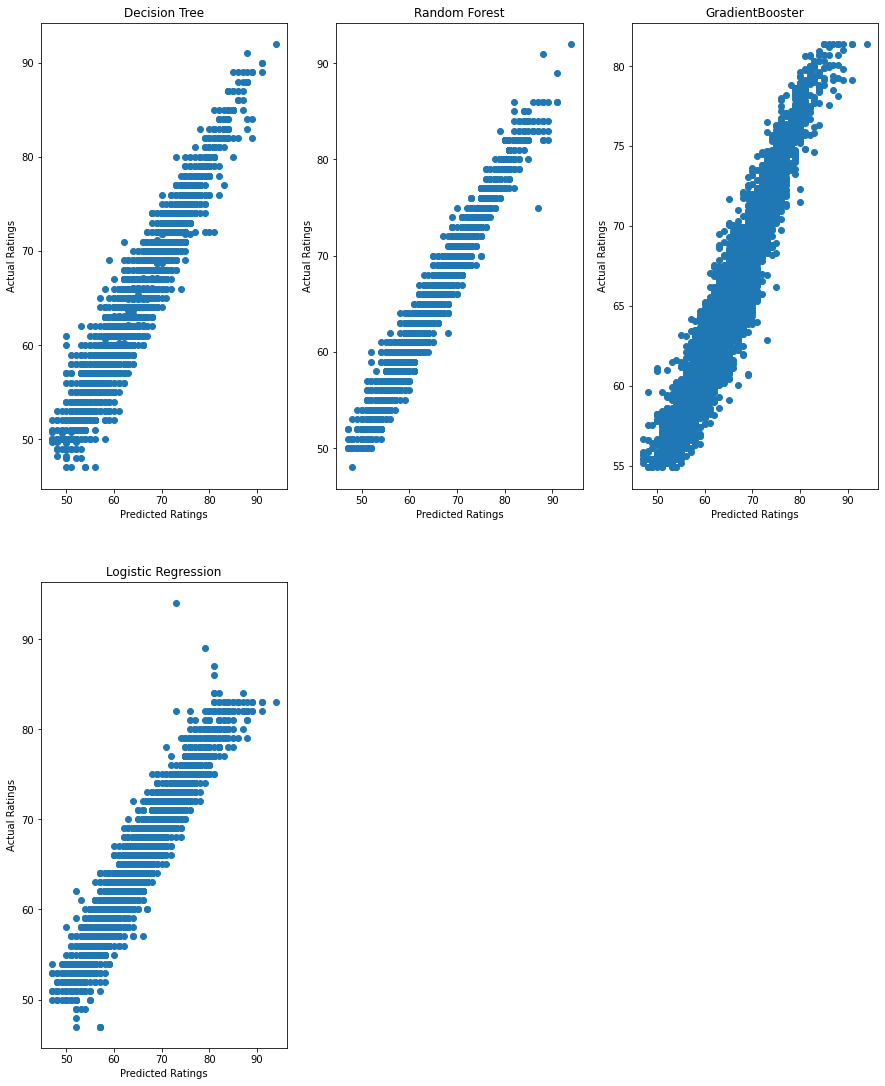

In [16]:
# Import classifiers
# from sklearn.neural_network import MLPRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Ridge, LinearRegression, Lasso, LogisticRegression
# from xgboost import XGBRegressor

#Import helper functions
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import r2_score

import time

# Function to help with repeated plotting of predictions
def pred_plotter(X_test, y_test, model, model_name = ""):
    preds = model.predict(X_test)
    plt.scatter(y_test, preds)
    plt.xlabel("Predicted Ratings")
    plt.ylabel("Actual Ratings")
    plt.title(model_name)

# Names of classifiers we want to use
clf_names = [
            # "KNN", "Linear SVM",
            #  "RBF SVM",
            #  "Bagging Classifier",
             "Decision Tree", 
             "Random Forest", 
            #  "Neural Net", 
            #  "AdaBoost",
            #  "Naive Bayes", 
             "GradientBooster", 
            #  "LDA",
            #  "XGBoost", 
            #  "Linear Regression",
             "Logistic Regression",
            #  "Ridge", 
            #  "Lasso"
             ]

# Implementation of each classifier we want to use, large scope in here for parameter tuning etc.
clfs = [
        # KNeighborsRegressor(3),
        # SVC(kernel="linear", C=0.025),
        # SVC(gamma=2, C=1),
        # BaggingRegressor(KNeighborsRegressor(), max_samples=0.5, max_features=0.5),
        DecisionTreeRegressor(max_depth=20),
        RandomForestClassifier(n_estimators=250, random_state=24),
        #RandomForestRegressor(max_depth=5, n_estimators=250, max_features=4),
        # MLPRegressor(alpha=1),
        # AdaBoostRegressor(),
        # GaussianNB(),
        GradientBoostingRegressor(n_estimators = 20),
        # LinearDiscriminantAnalysis(),
        # XGBRegressor(),
        # LinearRegression(),
        LogisticRegression(), 
        # Ridge(alpha = 1.0,fit_intercept=True),
        # Lasso(alpha = 1.0, fit_intercept=True)
       ]

# Create test/train splits, and initialise plotting requirements
#  We won't apply on feature reduction here, but it can be explored. 
X = df_vals.values 
X = scale(X)
y = rating.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
regressor_data = pd.DataFrame(columns = ["Name", "Score", "Training_Time"])
fig = plt.figure(figsize = (15,60))
i = 0
print('here!')
# Iterate over each regressor (no cross validation/KFolds yet)
for name, clf in zip(clf_names, clfs):
    print("#" * 80)
    print("Fitting '%s' regressor." % name)
    
    # Time required to fit the regressor
    t0 = time.time()
    clf.fit(X_train, y_train)
    t1 = time.time()
    preds = clf.predict(X_test)
    score = r2_score(y_test, preds)
    print("Name: %s Score: %.2f Time %.4f secs" % (name, score, t1-t0))
    
    # Create a plot showing predictions against actual
    ax = fig.add_subplot(6,3,i+1)
    pred_plotter(X_test, y_test, clf, name)
    
    # Store results  
    regressor_data.loc[i] = [name, score, t1-t0]
    i += 1
plt.show()

In [17]:
regressor_data.sort_values(by="Score", ascending = False)

,Name,Score,Training_Time
1,Random Forest,0.960378,14.401242
0,Decision Tree,0.926643,0.304855
3,Logistic Regression,0.903018,3.014886
2,GradientBooster,0.882889,1.055484


## Improving results

In [ ]:
from sklearn.ensemble import BaggingRegressor

eclf1= BaggingRegressor(RandomForestClassifier(),n_estimators = 200)

eclf1.fit(X_train, y_train)
score = r2_score(y_test, eclf1.predict(X_test))
print("Bagging RF Score: ", score)
pred_plotter(X_test, y_test, eclf1, "Bagging Regressor")
plt.show()

## Plot raw data for missing values

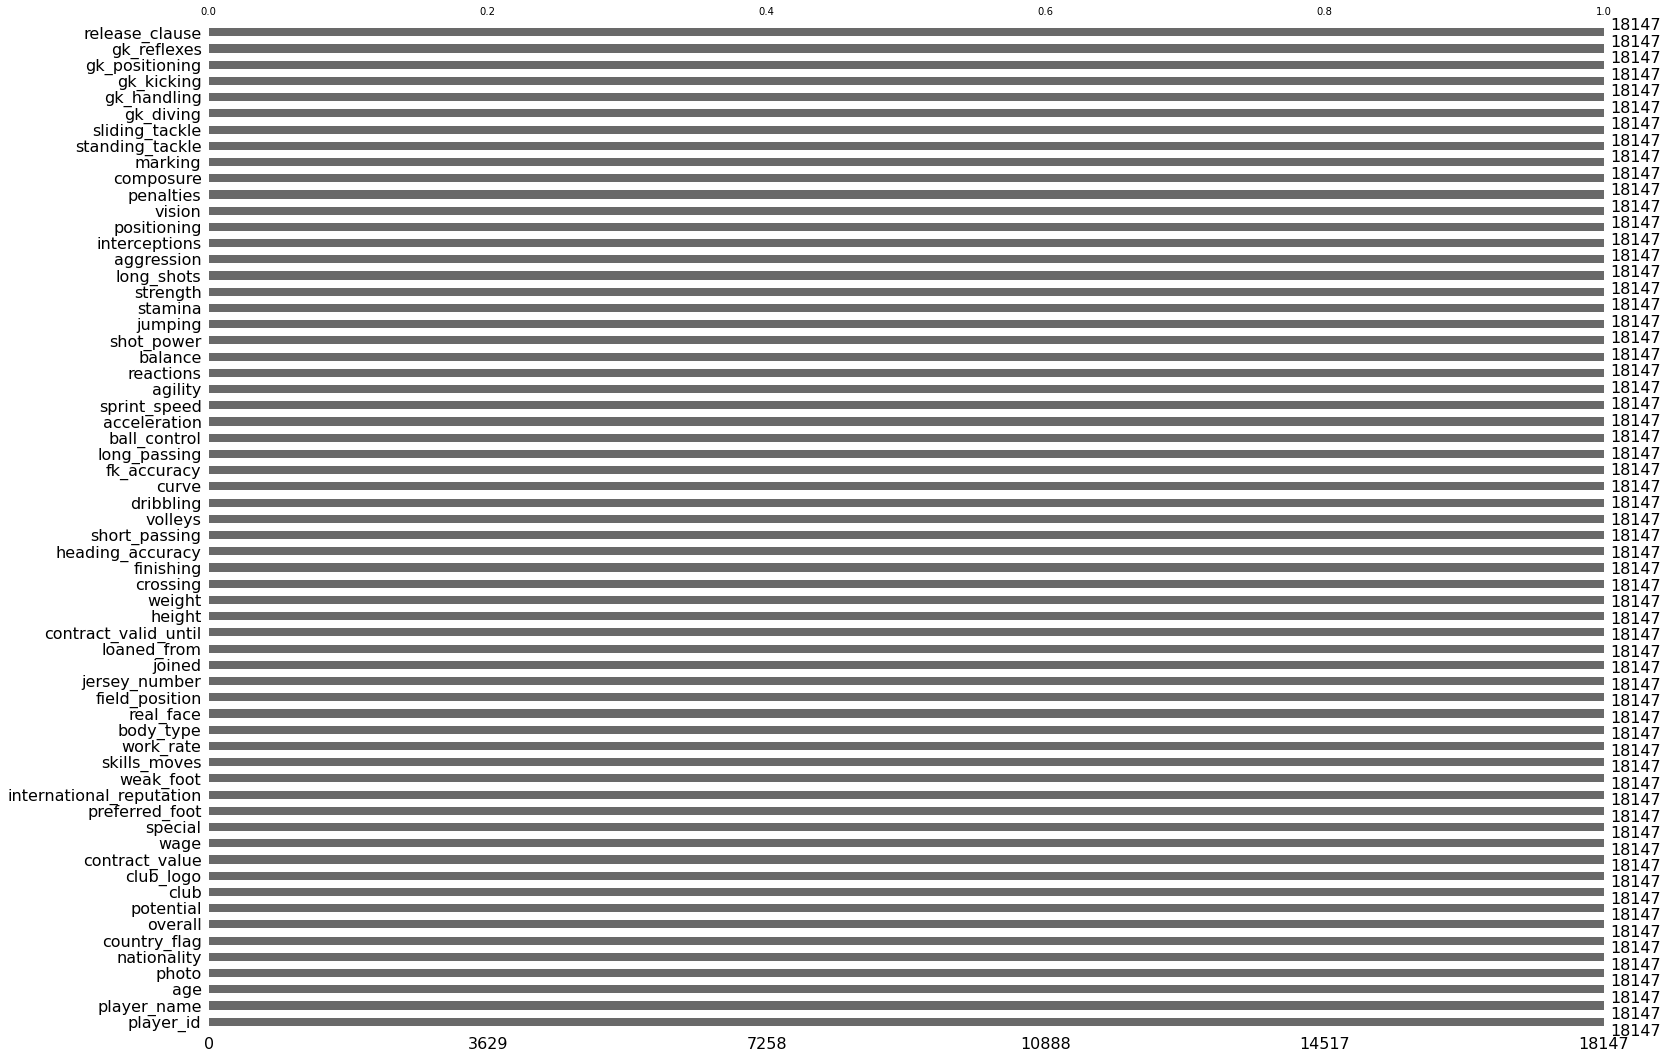

In [19]:
# https://github.com/ResidentMario/missingno
# !pip install missingno

import missingno as msno
plot_count = 1
column_groups = np.array_split(data.columns, plot_count)

for columns in column_groups:
    msno.bar(data[columns])
    plt.show()

## Categorical and numeric attributes in raw data

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

print("Number of numeric attributes - " + str(len(data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)))
print("Number of categorical attributes - " + str(len(data.select_dtypes(include=['object']).columns)))

Number of numeric attributes - 38
Number of categorical attributes - 24


## Correlation matrix between categorical and numeric attributes

In [21]:
for position_value in data['field_position'].unique():
    
    corr_matrix = data[data['field_position'] == position_value].corr()['overall'].to_frame()
    temp_df = corr_matrix['overall'].sort_values(ascending=False)
    
    print(f'********** Current Position: {position_value}: \n ')
    
    print(temp_df)
    
    print('\n')

    print(f'-------------------------------------------------------------')
    
    print('\n')


********** Current Position: RF: 
 
overall             1.000000
ball_control        0.958956
dribbling           0.955572
short_passing       0.940942
long_shots          0.937930
finishing           0.930346
crossing            0.921477
reactions           0.916027
potential           0.915309
positioning         0.910259
composure           0.880615
vision              0.875421
curve               0.832030
volleys             0.777101
fk_accuracy         0.755356
shot_power          0.732841
long_passing        0.703595
balance             0.629419
penalties           0.607810
acceleration        0.477449
agility             0.470159
age                 0.378507
sprint_speed        0.313148
heading_accuracy    0.218312
gk_kicking          0.124607
jumping             0.062398
gk_positioning      0.025783
stamina             0.010106
aggression         -0.034344
sliding_tackle     -0.037647
standing_tackle    -0.075004
gk_handling        -0.095968
interceptions      -0.117836
gk_refl

Name: overall, dtype: float64


-------------------------------------------------------------


********** Current Position: LS: 
 
overall             1.000000
positioning         0.899508
ball_control        0.896109
finishing           0.875684
reactions           0.868560
composure           0.827874
shot_power          0.822499
dribbling           0.820096
potential           0.813882
volleys             0.797895
long_shots          0.784198
short_passing       0.771651
vision              0.652328
penalties           0.626110
curve               0.584454
crossing            0.548905
long_passing        0.526370
fk_accuracy         0.524028
heading_accuracy    0.491197
aggression          0.386651
interceptions       0.350831
age                 0.345452
stamina             0.293916
marking             0.280990
agility             0.273079
standing_tackle     0.257170
strength            0.249732
sliding_tackle      0.212200
sprint_speed        0.150727
jumping             0.14823

In [22]:
import statsmodels.api as sm

for position in data['field_position'].unique(): 
    
    try:
    
        # Subset by position
        temp_df = data[data['field_position'] == position]

        # Find correlations
        temp_corr = data[data['field_position'] == position].corr()['overall'].to_frame()
        temp_corr = temp_corr[temp_corr['overall'] > 0.5]


        # Keep only columns with correltion above 0.5
        temp_features = list(temp_corr.T)
        temp_model_df = temp_df[temp_features]

        #print(temp_features)
        # Split data into train and test, isolate y (target/dependent variable)
        train_set, test_set = train_test_split(temp_model_df, test_size=0.2, random_state=42)
        target_train = train_set['overall']
        train_set = train_set.drop(['overall'], axis = 1) #, 'potential', 'overall'], axis = 1)
        

        # Fit model
        train_set = sm.add_constant(train_set, prepend=False)

        # Fit and summarize OLS model
        mod = sm.OLS(target_train, train_set, missing='drop')

        res = mod.fit()
        
        features = pd.DataFrame([res.pvalues, res.params]).T
        features.columns = ['P-value', 'Coefficient']
        features = features[features['P-value']<0.05]
        features = features.sort_values(by = 'Coefficient', ascending = False)
    

        print(f' ********* Current Position: {position}: \n ')
        print(f' ********* Significant features in order of impact: {features.index}: \n ')
        print(res.summary())
        print('\n')
        
    except BaseException as e: 
        print(f'WARNING: SKIPPING {position} due to {e}')

 ********* Current Position: RF: 
 
 ********* Significant features in order of impact: Index([], dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                nan
Time:                        22:17:12   Log-Likelihood:                 337.64
No. Observations:                  12   AIC:                            -651.3
Df Residuals:                       0   BIC:                            -645.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------

C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     200.9
Date:                Mon, 19 Jul 2021   Prob (F-statistic):          3.12e-155
Time:                        22:17:13   Log-Likelihood:                -594.08
No. Observations:                 312   AIC:                             1228.
Df Residuals:                     292   BIC:                             1303.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
potential         0.1547      0.025      6.133

C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)



 ********* Significant features in order of impact: Index(['const', 'standing_tackle', 'marking', 'interceptions',
       'sliding_tackle', 'strength', 'heading_accuracy', 'aggression',
       'reactions', 'short_passing', 'ball_control', 'potential', 'composure',
       'dribbling'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:17:13   Log-Likelihood:                -1368.8
No. Observations:                1422   AIC:                             2770.
Df Residuals:                    1406   BIC:                             2854.
Df Model:                          15                  

 
 ********* Significant features in order of impact: Index(['const', 'standing_tackle', 'marking', 'heading_accuracy',
       'interceptions', 'sliding_tackle', 'aggression', 'reactions',
       'potential', 'ball_control', 'short_passing', 'composure'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1851.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:17:13   Log-Likelihood:                -638.03
No. Observations:                 518   AIC:                             1302.
Df Residuals:                     505   BIC:                             1357.
Df Model:                          12                                         
Covaria

C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)





 ********* Current Position: RDM: 
 
 ********* Significant features in order of impact: Index(['const', 'potential', 'reactions', 'short_passing', 'long_passing',
       'composure', 'shot_power'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           7.40e-79
Time:                        22:17:13   Log-Likelihood:                -390.66
No. Observations:                 198   AIC:                             811.3
Df Residuals:                     183   BIC:                             860.6
Df Model:                          14                                         
Covariance Type:            nonrobust                        

 
 ********* Significant features in order of impact: Index([], dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     28.14
Date:                Mon, 19 Jul 2021   Prob (F-statistic):            0.00280
Time:                        22:17:13   Log-Likelihood:                -4.4735
No. Observations:                  16   AIC:                             32.95
Df Residuals:                       4   BIC:                             42.22
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [25]:
print(f'in the dataset there are {len(data.columns)} columns and {len(data)} rows')

in the dataset there are 62 columns and 18147 rows
